***
 # PCA, KMeans Clustering, Hierarchical Clustering
***
***

 ### Problem Statement: 
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)

# Step 1: Import Libraries required

In [57]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading & Feature understanding.

In [58]:
dataset = pd.read_csv('wine.csv')
dataset.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [59]:
dataset.keys()

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

### Understanding wine fetures

1. Type : Type of wine


2. Alchohol :
Alchohol % in wine (Wine is an alcoholic drink typically made from fermented grape juice.)


3. <p align="justify"> Malic : Type of acid. Malic acid is one of two major naturally occurring acids in wine grapes (and inother fruit). This acid presents itself as a pleasant, refreshing juicy taste, similar to biting into an apple. Malic acid is usually left in a wine to make it refreshing and tart. However, when there is too much malic acid, it is converted to lactic acid through malolactic fermentation, so that the wine will be smooth, full-bodied and complex.</p>


4. Ash : 
    * On the average about 2.5 g/L of ash are found in wine.
    * Ash being defined as the inorganic matter that remains after evaporation and incineration.
    * Cations - most of the ash falls into this class and includes potassium, sodium, calcium, magnesium, iron, copper, lead, arsenic, etc.
    
    (Note: Cation meaning: a positively charged ion, i.e. one that would be attracted to the cathode in electrolysis.)
    
    
5. Alcalinity : Alkalinity of ash measures the basicity (alkalinity) of the ash obtained from a sample. This is accomplished by adding acid to the ash until the solution is neutralized. Basically Wine acidity is considered. Not found much information on Alcanity of Wine..Sorry!!


6. Magnesium (mg/litre) :
    * Magnesium is one of the trace element in wine. 
    * Generally, elevation of magnesium resulted in a well- balanced wine with respect to flavour. Maintenance of high magnesiumcalcium levels will, therefore, not only act as a stimulus to ethanolic fermentation, but may also result in a more palatable wine. 
    
    
7. Phenols (mg/litre) : (Related to color & taste)
    * Phenols are responsible for the red color in red wine. It is an organic compound released by plants and animals as a part of their defense mechanisms with a central cyclic benzene ring and varying number of hydroxyl groups as substituents. So, the more stressed the vines are, the more phenols they will produced. Phenols not only affect the color in red wines, but also act as preservatives and affect the taste of wine. Phenols used in winemaking are subdivided into two different groups: non-flavanoids and flavanoids.
    
    
8. Flavonoids : Flavionoids include the anthocyanins and tannins which contribute to the color and mouthfeel of the wine.
    * Wine flavonoids develop from the seeds and skins of the grapes themselves. They are the largest type of antioxidant found in red wines and are the clear MVP behind their range of health benefits. The healthiest red wines have high amounts of the antioxidant flavonoid resveratrol. (fyi.)
    
    
9. Nonflavanoids : 
    * Nonflavanoids are the primary contributor to the color white wine. Compared to color in red wine, the chemical nature of color in white wine is not very well understood. The majority of the phenols in white wine are nonflavanoid hydroxycinamates. These include caftaric acid, coumaric acid and ferulic acid.
    
    
10. Proanthocyanins : Proanthocyanidins are the principal polyphenols in red wine that are under research to assess risk of coronary heart disease and lower overall mortality. With tannins, they also influence the aroma, flavor, mouth-feel and astringency of red wines.


11. Color : Wine color difference from standard set. It is calculated by color difference equation.
    (https://sensing.konicaminolta.us/us/blog/identifying-color-differences-using-l-a-b-or-l-c-h-coordinates/)
    
    
12. Hue : Color shade. a simplistic measure of the appearance of the color – a ratio of the absorbance in the violet to the absorbance in the green. Wine color hue = A420/ A520. CIE L*a*b* is one of the most widely used international scales for color


13. Dilution : Dilution Factor. The dilution increases the volume of wine 


14. Proline is typically the most abundant amino acid present in grape juice and wine. The amount present is influenced by viticultural and winemaking factors and can be of diagnostic importance.

# Step 3: Data preprocessiing 

In [60]:
# importing dataset

dataset = pd.read_csv('wine.csv')

In [61]:
# first 5 rows of dataset

dataset.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [62]:
# checking shape of dataset. i.e no. of rows and columns

dataset.shape

(178, 14)

In [63]:
# Checking dataset column names & numbers.

print(len(dataset.keys()))
dataset.keys()

14


Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [65]:
# checking for null values..

dataset.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [66]:
# checking unique values form dependent variable 'Type' column

dataset.Type.unique()

array([1, 2, 3], dtype=int64)

# Step 4:  Exploratory Data Analysis

In [67]:
# checking numerical data information..

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


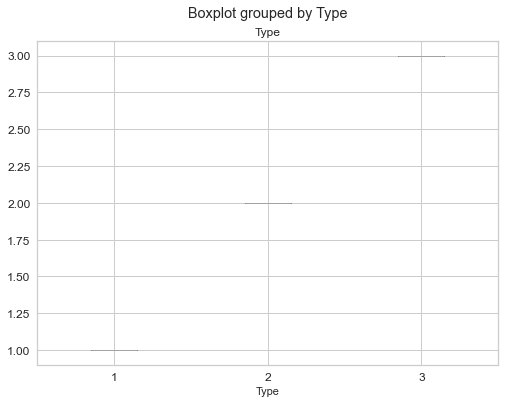

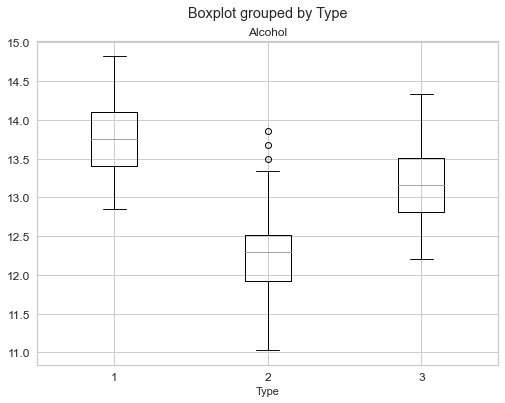

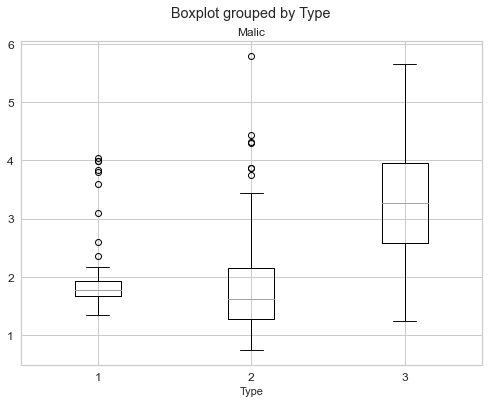

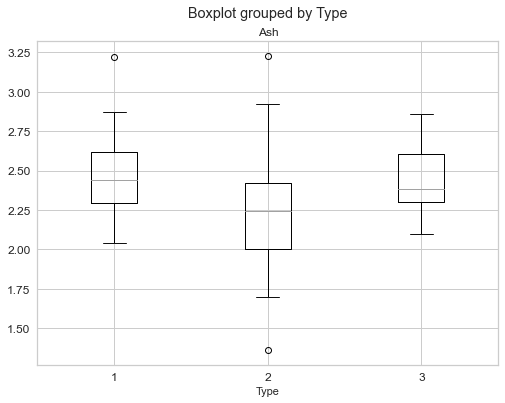

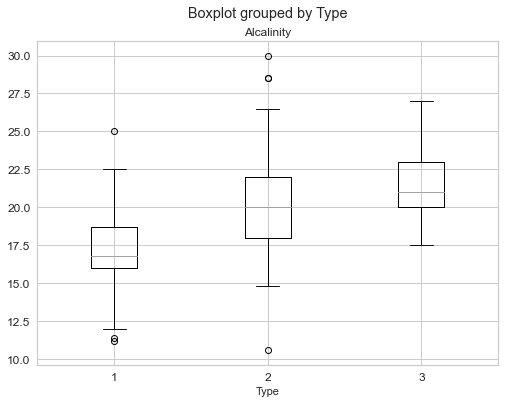

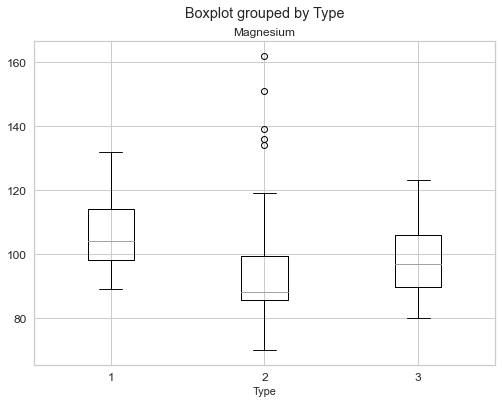

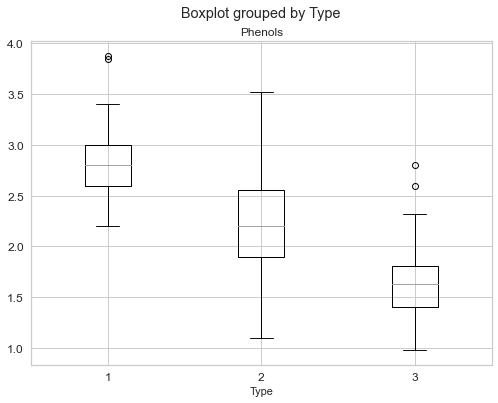

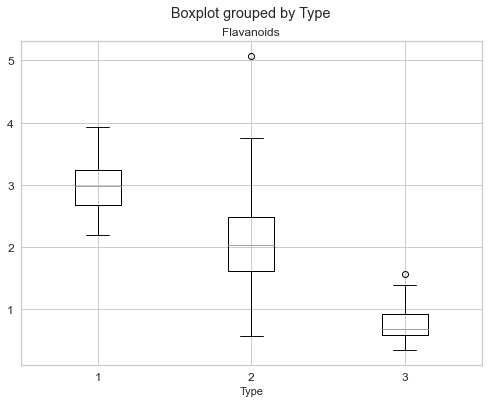

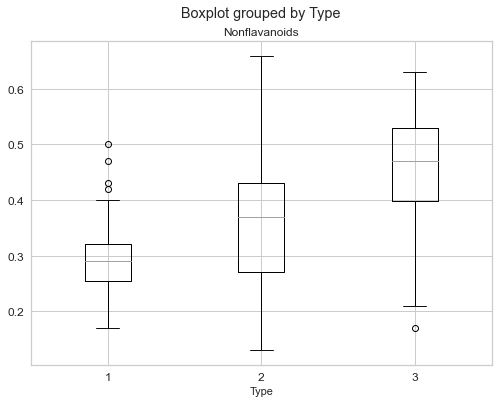

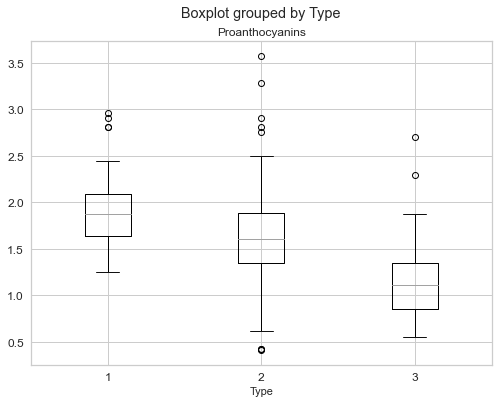

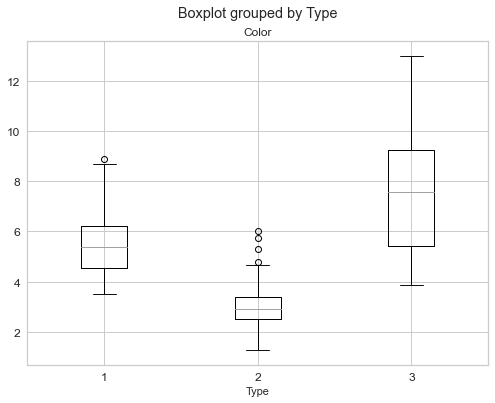

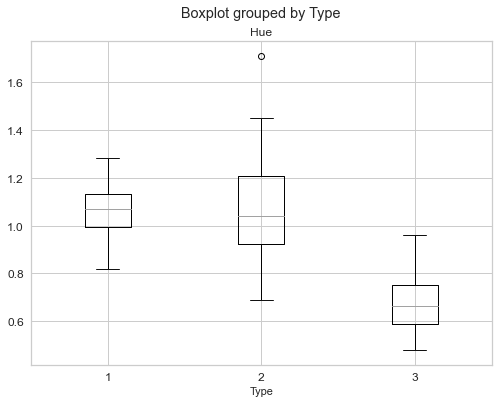

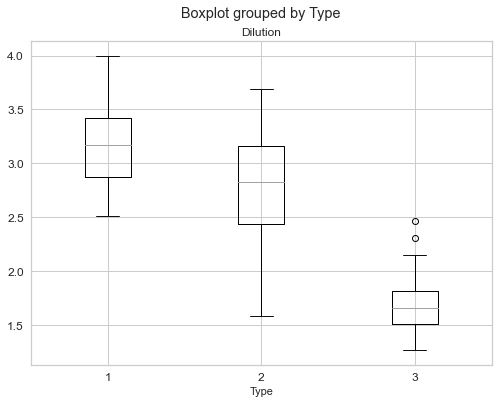

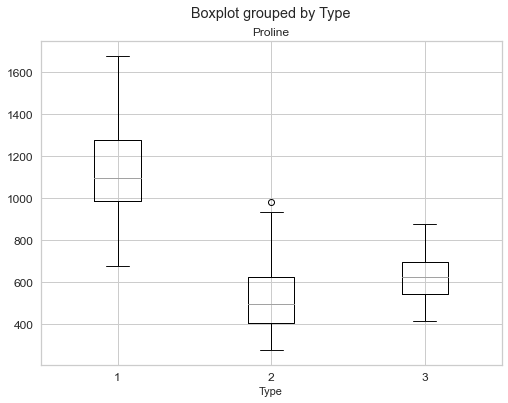

In [68]:
# plotting boxplots..

for i in dataset.keys():
    boxplot = dataset.boxplot(by ='Type', column=[i], fontsize=12, figsize=(8,6))

<Figure size 576x396 with 0 Axes>

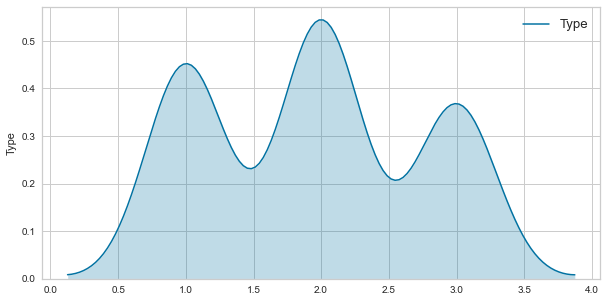

<Figure size 576x396 with 0 Axes>

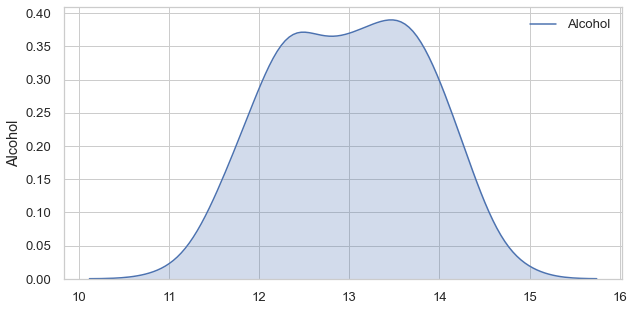

<Figure size 576x396 with 0 Axes>

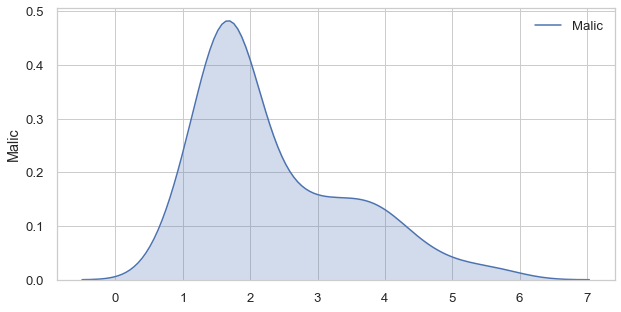

<Figure size 576x396 with 0 Axes>

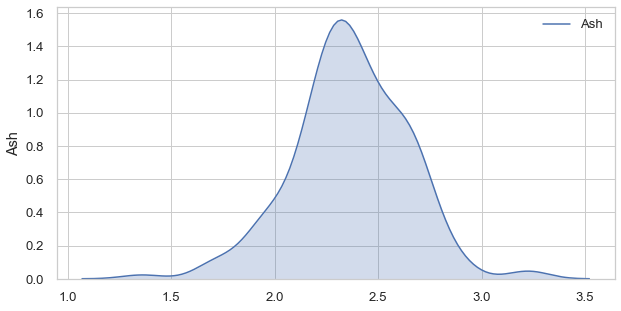

<Figure size 576x396 with 0 Axes>

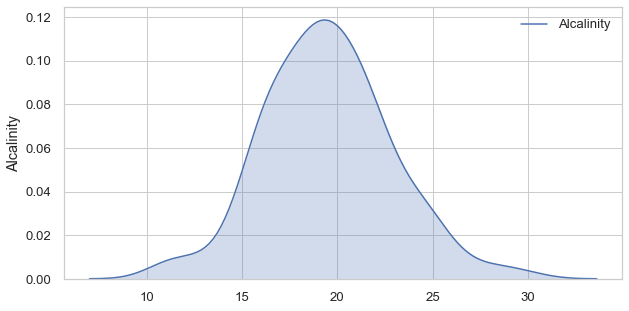

<Figure size 576x396 with 0 Axes>

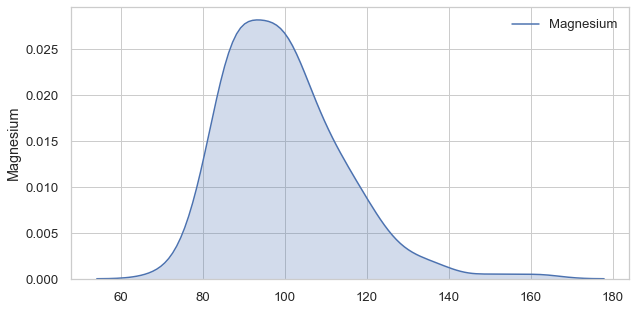

<Figure size 576x396 with 0 Axes>

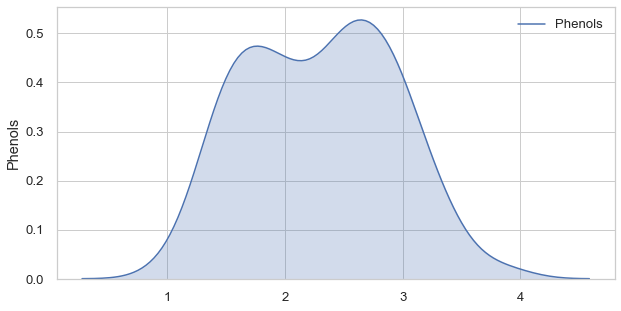

<Figure size 576x396 with 0 Axes>

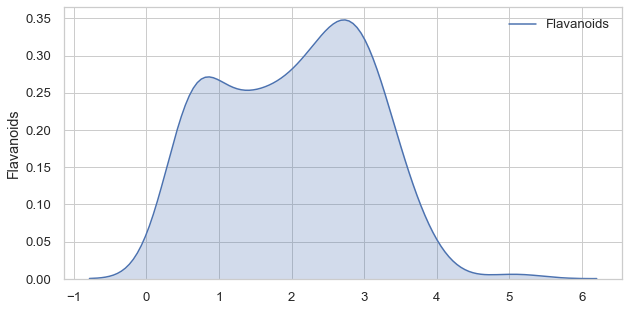

<Figure size 576x396 with 0 Axes>

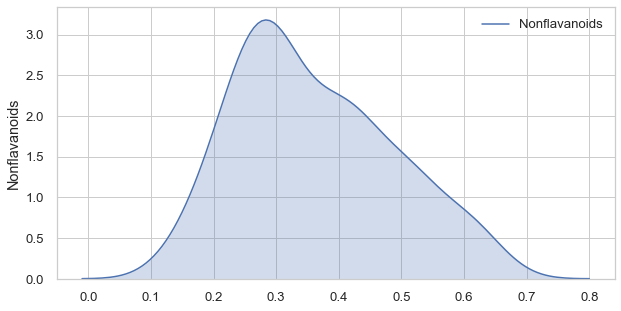

<Figure size 576x396 with 0 Axes>

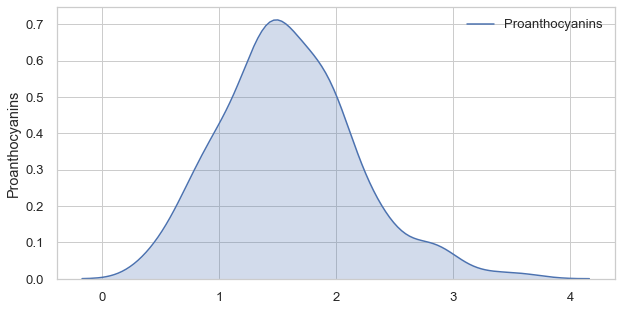

<Figure size 576x396 with 0 Axes>

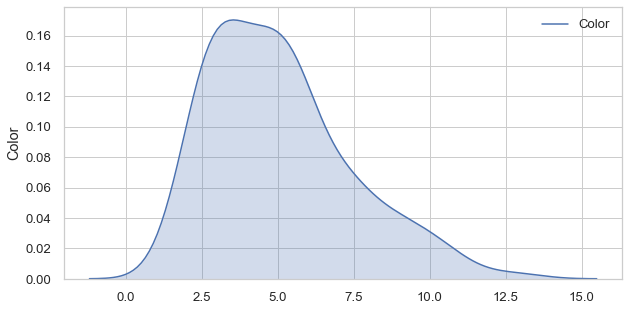

<Figure size 576x396 with 0 Axes>

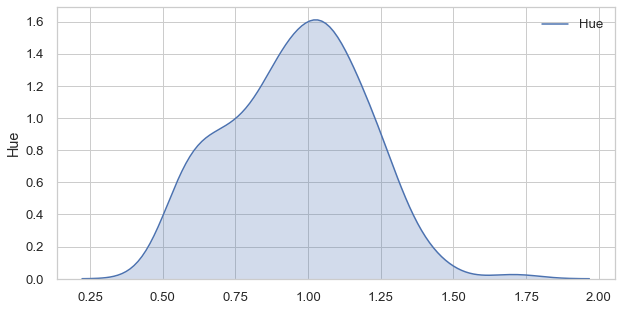

<Figure size 576x396 with 0 Axes>

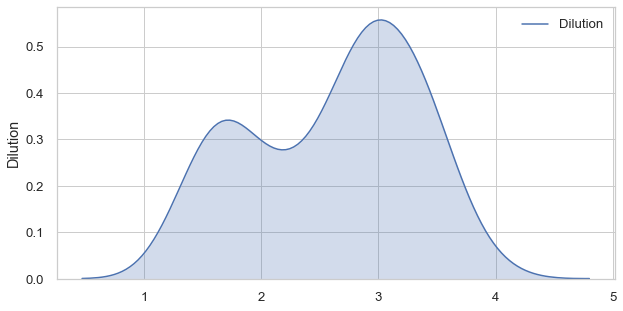

<Figure size 576x396 with 0 Axes>

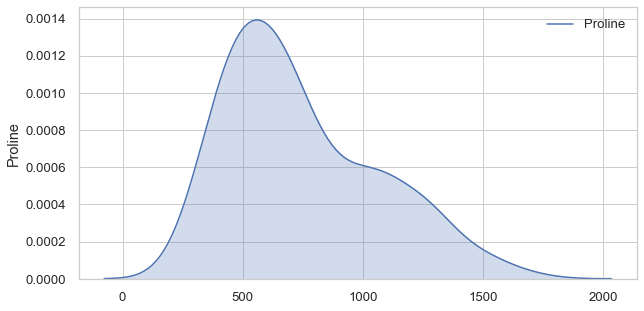

In [69]:

for i, col in enumerate(dataset.columns):
    sns.set_style('whitegrid')
    plt.figure(i)
    fig, ax =plt.subplots(figsize=(10,5))
    sns.set(font_scale = 1.2)
    sns.kdeplot(dataset[col], shade=True)
    plt.ylabel(col)
    plt.show()
    

***

# Step 4 : Dataset separation, Data Satndardization

In [70]:
# Indepedent Variable dataset.

x = dataset.drop(['Type'], axis=1)
x.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
# Dependent variable.

y = pd.DataFrame(dataset['Type'],columns=['Type'])

In [72]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [73]:
# Data standardization.

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)

# Principle Component Analysis.

It reduces number of columns that is features

* Let's see how much we can reduce the dimensions while still keeping 95% variance. We will apply Principle Component Analysis (PCA) to independent dataset (x). The reason for this is that by keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means. 

Note that pca_com will only be used for k-means, t-SNE will still use the original feature X.

In [74]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42, n_components=0.95)                  # n_Componets = 0.95 use hyperparameter..which gives PCA contains 95% variance
pca_com = pca.fit_transform(x)                                 # we will use pca_com for k means 
pca_com.shape

(178, 10)

In [75]:
print(pca.singular_values_)

[28.94203422 21.08225141 16.04371561 12.78973645 12.32374195 10.68713954
  9.90368818  7.8760733   7.17081793  6.6828618 ]


In [76]:
variance_ratio = pca.explained_variance_ratio_
print('explained_variance_ratio:')
print((variance_ratio)*100)

# This provides informatin that PCA1 has variance 36.19%, PCA2 has 19.20%, PCA3 has 11.12%,....,etc

explained_variance_ratio:
[36.1988481  19.20749026 11.12363054  7.06903018  6.56329368  4.93582332
  4.23867932  2.68074895  2.2221534   1.93001909]


In [77]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of variance will give much information..

cum_variance = np.cumsum(variance_ratio)
cum_variance

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717])

 ### Creating PCA Dataframe..

In [78]:
df_PCA = pd.DataFrame(data=pca_com, columns=['PC1','PC2','PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_PCA['Type'] = dataset['Type'] 
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,1


 ### Visualizing... Understanding what we did exactly

In [79]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_com,
    labels=labels,
    dimensions=range(4),
    color=dataset["Type"]
)
fig.update_traces(diagonal_visible=True)
fig.show()

In [80]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    pca_com, x=0, y=1, z=2, color=dataset["Type"],
    title=f'Total Explained Variance: {total_var:.2f}%'
)
fig.show()

 ### UInderstanding Concept..Selecting max. number of PCA components

THis is the long way to clear concept..instead of doing this you may directly by using PCA hyperparameter n_componets =0.95

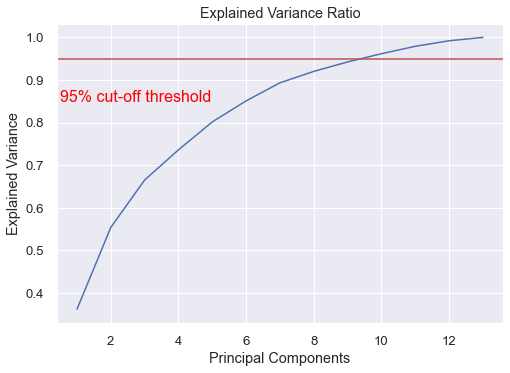

In [81]:
pca_Selection = PCA(random_state=42)
pca_example = pca_Selection.fit_transform(x)


plt.plot(np.arange(1, 14, step=1), np.cumsum(pca_Selection.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

****

# K-means clustering:
***

 ### K-Means is a partition-based method of clustering and is very popular for its simplicity.

## Step 1: How many clusters?

To find the best k value for k-means we'll look at the distortion at different k values. Distortion computes the sum of squared distances from each point to its assigned center. When distortion is plotted against k there will be a k value after which decreases in distortion are minimal. This is the desired number of clusters.
 
 ## Different methods to determine how many clusters:

* Direct Method: Direct methods: consists of optimizing a criterion, such as the within cluster sums of squares or the average silhouette. The corresponding methods are named elbow and silhouette methods, respectively.

    1. Elbow method
    2. Average silhouette method
    
    
* Statistical testing methods: consists of comparing evidence against null hypothesis. An example is the gap statistic.
    3. Gap statistic method

### Method 1: Elbow Method

the basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.

The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

 ### Steps for Elbow Method:
    
1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.


2. For each k, calculate the total within-cluster sum of square (wss).


3. Plot the curve of wss according to the number of clusters k.


4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

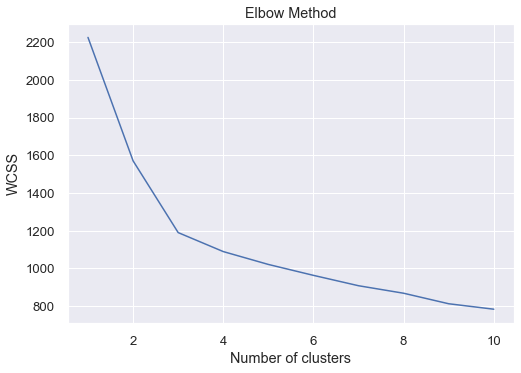

In [82]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_com)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 ### Conclusion: The location of a bend (knee) in the plot is at 3 which is an indicator of the appropriate number of clusters.

### Method 2: Average silhouette method
 
 https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/
 
 https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
 
 https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/

Briefly, it measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering.

Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k (Kaufman and Rousseeuw 1990).

The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.

For each observation i, the silhouette width si is calculated as follows:

1. For each observation i, calculate the average dissimilarity ai between i and all other points of the cluster to which i belongs.


2. * For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of C. 
 * The smallest of these d(i,C) is defined as bi=minCd(i,C). 
 * The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it does not belong.


3. Finally the silhouette width of the observation i is defined by the formula: Si=(bi−ai)/max(ai,bi).

In [83]:
y.Type.unique()

array([1, 2, 3], dtype=int64)

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

print(silhouette_score(x, kmeans.labels_))

0.1222950560957666


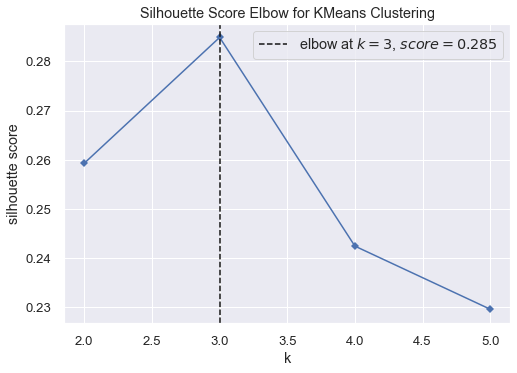

In [85]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(x)    
visualizer.poof()
plt.show()

The plot shows max. number of cluster is 3
***

In [86]:
n_clusters = [2,3,4,5,6]  # always start number from 2.

for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_com)
    silhouette_avg = silhouette_score(pca_com, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.26967763793560773
For n_clusters = 3 The average silhouette_score is : 0.29867482943692875
For n_clusters = 4 The average silhouette_score is : 0.2677009093649607
For n_clusters = 5 The average silhouette_score is : 0.23637215393225694
For n_clusters = 6 The average silhouette_score is : 0.20774156816572462


Select max. score value. Here when n_clusters = 3 the avg. score is max 0.298

### Method 3: Gap statistic method

The gap statistic has been published by R. Tibshirani, G. Walther, and T. Hastie (Standford University, 2001). The approach can be applied to any clustering method.

The gap statistic compares the total within intra-cluster variation for different values of k with their expected values under null reference distribution of the data. The estimate of the optimal clusters will be value that maximize the gap statistic (i.e, that yields the largest gap statistic). This means that the clustering structure is far away from the random uniform distribution of points.

1.	Cluster the observed data, varying the number of clusters from k = 1, …, kmax, and compute the corresponding total within intra-cluster variation Wk.


2.	Generate B reference data sets with a random uniform distribution. Cluster each of these reference data sets with varying number of clusters k = 1, …, kmax, and compute the corresponding total within intra-cluster variation Wkb.


3.	Compute the estimated gap statistic as the deviation of the observed Wk value from its expected value Wkb under the null hypothesis:
    * Gap(k)=1B∑b=1Blog(W∗kb)−log(Wk)Gap(k)=1B∑b=1Blog(Wkb∗)−log(Wk). 
    * Compute also the standard deviation of the statistics.


4.	Choose the number of clusters as the smallest value of k such that the gap statistic is within one standard deviation of 
the gap at k+1: Gap(k)≥Gap(k + 1)−sk + 1.


 ### Sorry..  I am working on it....!!!

## Step 2: Run k-means
***

Now that we have an appropriate k value, we can run k-means on the PCA-processed feature(pca_comp)

In [87]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(pca_com)
print(y_pred.shape)
y_pred

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [88]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [89]:
kmeans.cluster_centers_

array([[ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01, -2.18283242e-01,
         5.21099249e-02,  2.49642497e-02, -5.02855192e-02,
         7.46793027e-02],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02,  9.99252193e-02,
        -6.03831729e-02, -7.38798948e-03,  2.00269270e-02,
        -6.14683784e-02],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02,  1.29805766e-01,
        -2.32728507e-03, -1.80153234e-02,  3.22512140e-02,
        -2.30035303e-02]])

In [90]:
# Putting cluster value into dataset. So that we can group acc to requiremnet..

In [91]:
dataset1 = dataset.copy()

In [92]:
dataset1['KMeans_Clustering'] = y_pred

In [93]:
dataset1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clustering
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [94]:
dataset1.KMeans_Clustering.value_counts()

2    65
0    62
1    51
Name: KMeans_Clustering, dtype: int64

In [95]:
# Also we can put it in PCA dataset.

In [96]:
Kmeans_Df = df_PCA.copy()
Kmeans_Df['KMeans_Cluster']= y_pred
Kmeans_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Type,KMeans_Cluster
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,1,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,1,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,1,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,1,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,1,0


In [97]:
# Saving pandas dataset as csv in same working directory.

Kmeans_Df.to_csv('Kmeans_Df_PCA_cluster.csv',encoding='utf-8',index=False)
dataset1.to_csv('Kmeans_main_cluster.csv',encoding='utf-8',index=False)

***

# Heirarchical Clustering
***

theoratical blog: https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

## How many Clusters? Using Dendrogram.
 
 Drawing the dendrogram to help us decide the number of clusters for this particular problem:
 Dendrogram is one of the method to find no. of clusters. It is useful only for small data. For complex & Big data..hierarchical clustering not used at all. Hence this method is Not popular.

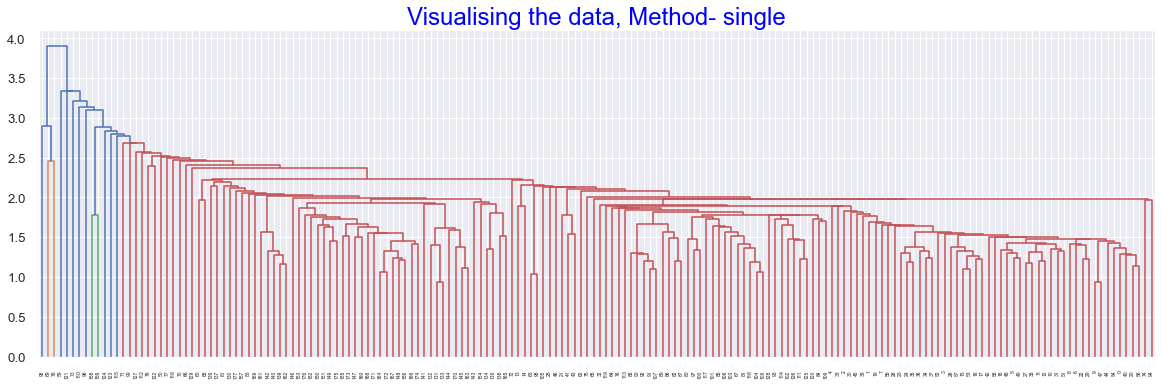

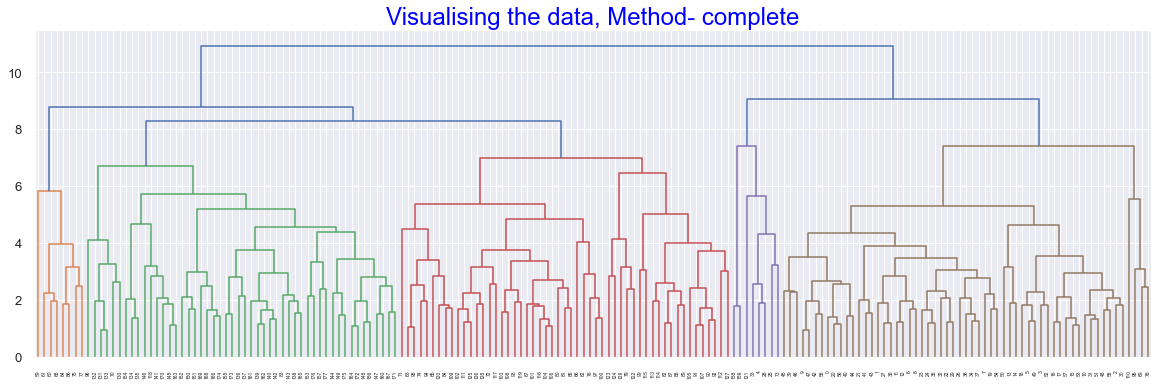

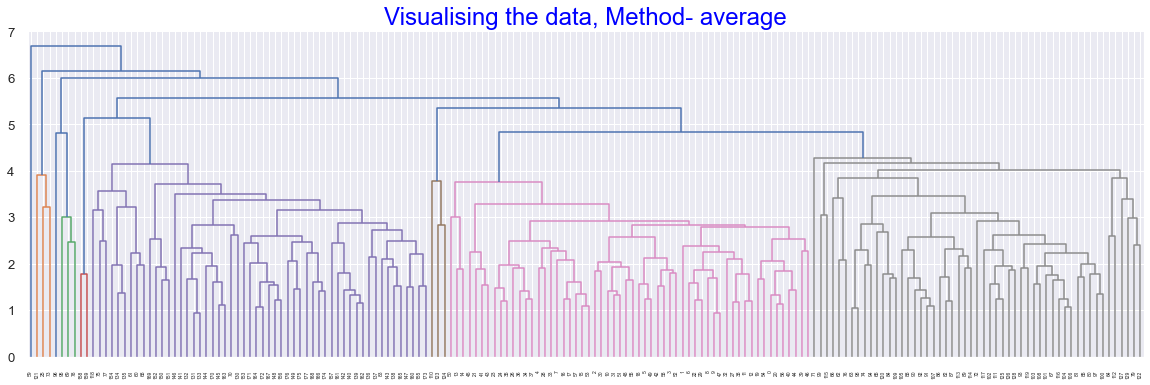

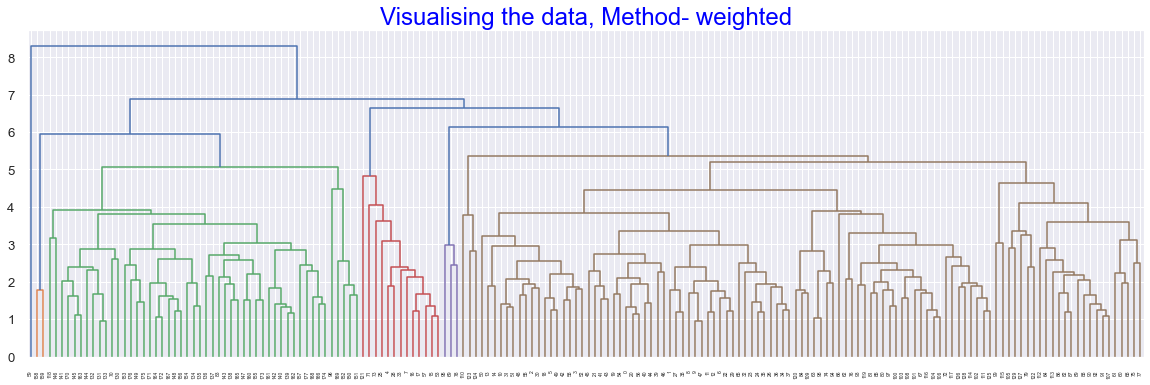

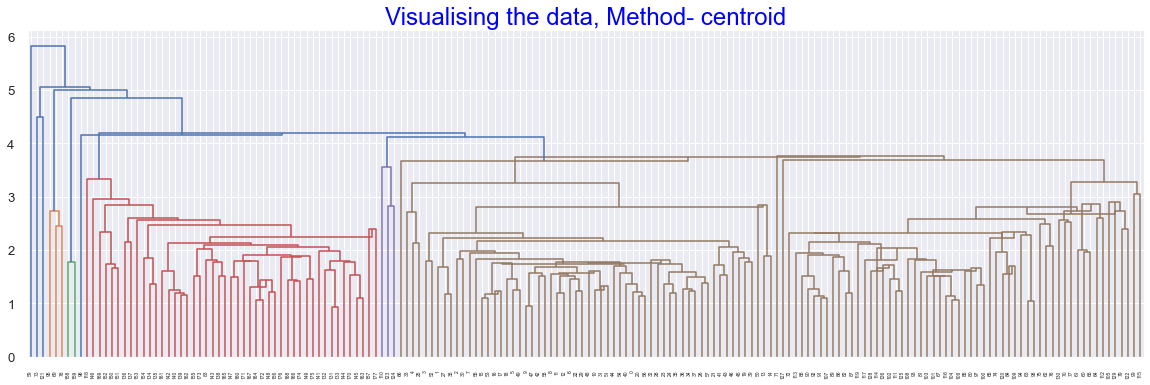

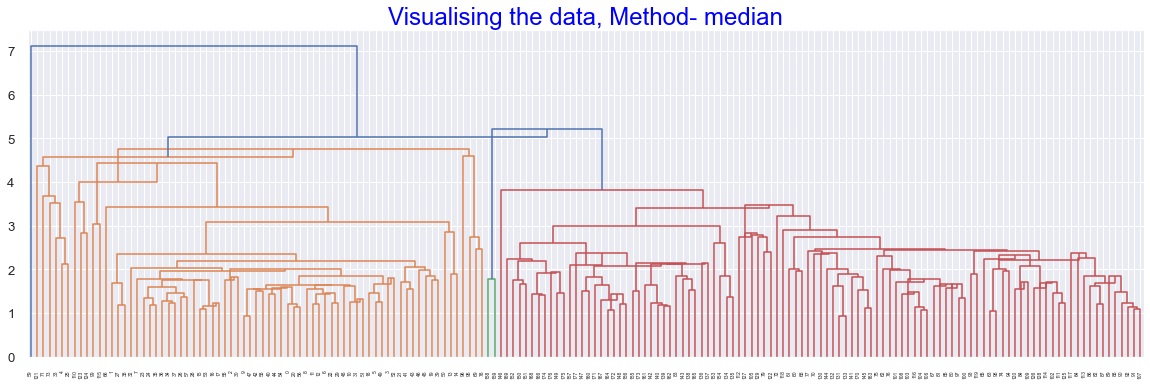

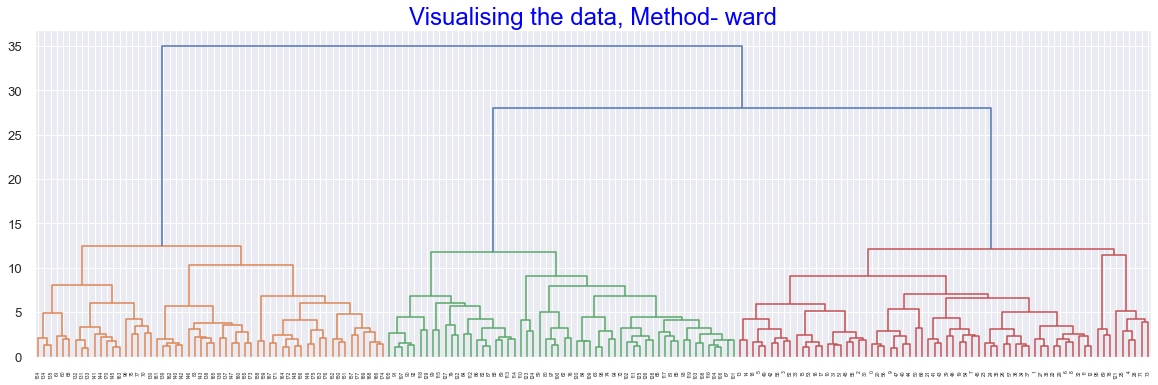

In [98]:
# Applying Dendrogram on PCA data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.

import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram = shc.dendrogram(shc.linkage(pca_com, method = methods,optimal_ordering=False))

 ### How many cluster Using  silhouette average method:

In [99]:
# Similar what we did in KMeans steps

from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels = hie_cluster.fit_predict(pca_com)
        silhouette_avg2 = silhouette_score(pca_com, hie_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_avg2)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.27203259421573645
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.25329755518203845
For n_clusters = 2 The average silhouette_score with linkage- average : 0.2639317816736075
For n_clusters = 2 The average silhouette_score with linkage- single : 0.2308490625690047

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2839520778138407
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.22271041837351757
For n_clusters = 3 The average silhouette_score with linkage- average : 0.14925264017611228
For n_clusters = 3 The average silhouette_score with linkage- single : 0.1870085132456752

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.22505552510993893
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.13355633035343034
For n_clusters = 4 The average silhouette_score with linkage- average : 0.1456995982758921

So min number useing 'ward' linkage & 'silhouette_score' is 3.

## Step 2: Run Heirarchical Clustering.

In [100]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
y_pred_hie = agg_clustering.fit_predict(pca_com)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

## Add predicted clusters into dataset

In [101]:
hie_Df = df_PCA.copy()

In [102]:
hie_Df['hie_clusters'] = y_pred_hie

In [103]:
hie_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Type,hie_clusters
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,1,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,1,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,1,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,1,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,1,1


In [104]:
# adding into main dataset.

dataset2 = dataset.copy()
dataset2['Hie_Clustering']= y_pred_hie
dataset2.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hie_Clustering
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [105]:
# Converting pandas dataframe into csv file & saving in same directory.

hie_Df.to_csv('Hie_PCA_cluster.csv',encoding='utf-8',index=False)
dataset2.to_csv('Hie_main_cluster.csv',encoding='utf-8',index=False)

# Visulizing KMeans & Hierarchical Clustering results..

Now, we will plot hie & kmeans clustering for one independent variable feature. To check is there any specific difference in Clustering tech.

 #### Don't compare both tech. with color codes..check the min & max values..

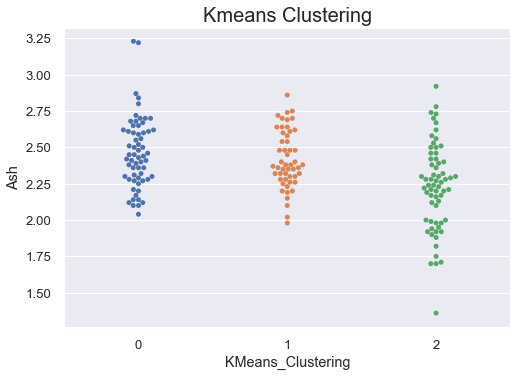

In [106]:
plt.title('Kmeans Clustering',fontsize =20)
sns.swarmplot(dataset1.KMeans_Clustering,dataset1['Ash'])
plt.show()

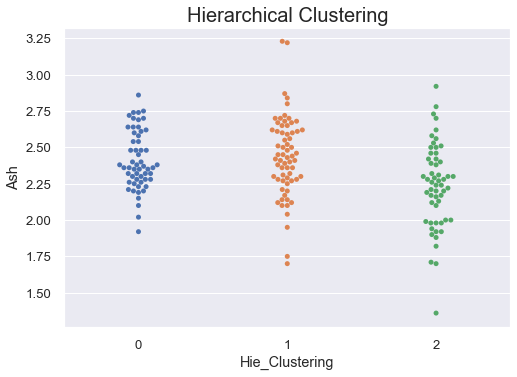

In [107]:
plt.title('Hierarchical Clustering',fontsize =20)
sns.swarmplot(dataset2.Hie_Clustering,dataset2['Ash'])
plt.show()

# Total row no. in each cluster..

In [108]:
dataset1.groupby(['KMeans_Clustering']).count() 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
KMeans_Clustering,,,,,,,,,,,,,,
0,62,62,62,62,62,62,62,62,62,62,62,62,62,62
1,51,51,51,51,51,51,51,51,51,51,51,51,51,51
2,65,65,65,65,65,65,65,65,65,65,65,65,65,65


In [109]:
dataset2.groupby(['Hie_Clustering']).count()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Hie_Clustering,,,,,,,,,,,,,,
0,56,56,56,56,56,56,56,56,56,56,56,56,56,56
1,66,66,66,66,66,66,66,66,66,66,66,66,66,66
2,56,56,56,56,56,56,56,56,56,56,56,56,56,56


# Conclusion:

Both clsutering tech has given same cluster numbers. And clustering total elements are approx. same. 

 ## Future work...Effects of outliers in KMeans & Hierarchical Clustering technique.

***